# Heart Disease Prediction

### Importing Required Packages

In [1]:
from pathlib import Path

import pandas as pd
import numpy as np


from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPClassifier, MLPRegressor 
# from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from dmba import classificationSummary, regressionSummary, gainsChart, liftChart
from mord import LogisticIT
from dmba import plotDecisionTree, classificationSummary, regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score


%matplotlib inline   
import matplotlib.pylab as plt

no display found. Using non-interactive Agg backend


### Data Pre-Processing

In [2]:
# Create data frame from the heart data set. 
heart_df = pd.read_csv('heart.csv')

# Determine dimensions of dataframe. 
heart_df.shape

(303, 14)

In [3]:
# Displaying the column data types in heart_df
heart_df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [4]:
# Displaying first 10 records of the heart_df data frame
print(heart_df.head(10))

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   
5   57    1   0       140   192    0        1      148      0      0.4      1   
6   56    0   1       140   294    0        0      153      0      1.3      1   
7   44    1   1       120   263    0        1      173      0      0.0      2   
8   52    1   2       172   199    1        1      162      0      0.5      2   
9   57    1   2       150   168    0        1      174      0      1.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1 

In [5]:
# Use describe() function to display column statistics
# for the entire data set. 
np.round(heart_df.describe(), decimals=2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00,303.00
mean,54.37,0.68,0.97,131.62,246.26,0.15,0.53,149.65,0.33,1.04,1.40,0.73,2.31,0.54
std,9.08,0.47,1.03,17.54,51.83,0.36,0.53,22.91,0.47,1.16,0.62,1.02,0.61,0.50
min,29.00,0.00,0.00,94.00,126.00,0.00,0.00,71.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,47.50,0.00,0.00,120.00,211.00,0.00,0.00,133.50,0.00,0.00,1.00,0.00,2.00,0.00
50%,55.00,1.00,1.00,130.00,240.00,0.00,1.00,153.00,0.00,0.80,1.00,0.00,2.00,1.00
75%,61.00,1.00,2.00,140.00,274.50,0.00,1.00,166.00,1.00,1.60,2.00,1.00,3.00,1.00
max,77.00,1.00,3.00,200.00,564.00,1.00,2.00,202.00,1.00,6.20,2.00,4.00,3.00,1.00


In [6]:
# Develop predictors X and output variable Y for the data set.
X = heart_df.drop(columns = ['target'])
y = heart_df['target']

In [7]:
# Develop training (67%) and validation(33% or 0.33) partitions for heart data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.33, random_state=1)

# Classification Tree For Heart Disease Prediction

### Smaller classification tree using DecisionTreeClassifier() control parameters.


Small Classification Tree with Control Parameters


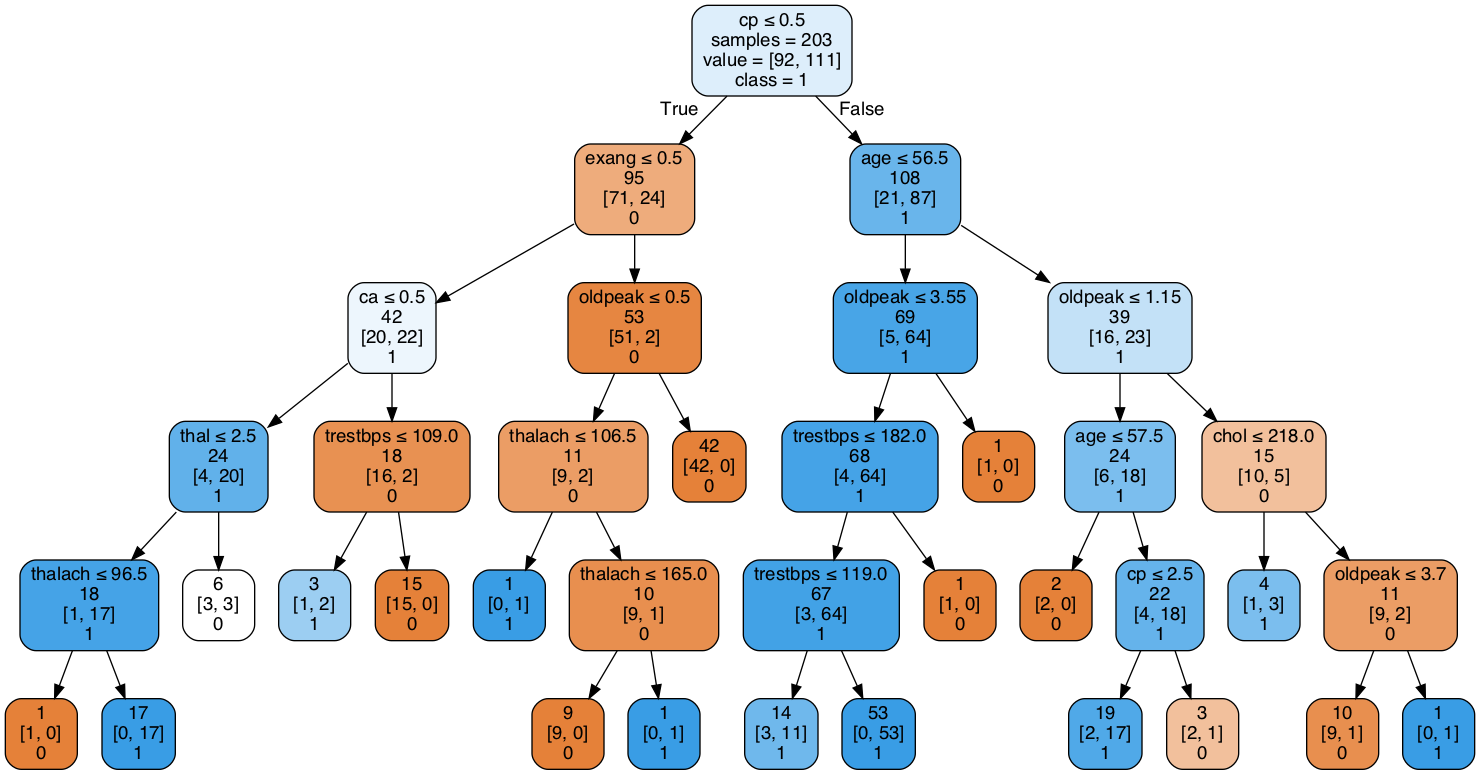

In [8]:
# Create a smaller classification tree for training partition
# using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 5;
#  - Minimum impurity decrease per split = 0.001 
#  - Minimum number of sample records in a node for splitting = 10.   
smallClassTree = DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.001, min_samples_split=10)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns, class_names=smallClassTree.classes_)

In [9]:
# Confusion matrices for smaller classification tree. 

# Identify  and display confusion matrix for training partition. 
print('Confusion matrix for Training Partition for Smaller Tree')
classificationSummary(train_y, smallClassTree.predict(train_X))

# Identify  and display confusion matrix for validation partition. 
print()
print('Confusion matrix for Validation Partition for Smaller Tree')
classificationSummary(valid_y, smallClassTree.predict(valid_X))

Confusion matrix for Training Partition for Smaller Tree
Confusion Matrix (Accuracy 0.9409)

       Prediction
Actual   0   1
     0  85   7
     1   5 106

Confusion matrix for Validation Partition for Smaller Tree
Confusion Matrix (Accuracy 0.7500)

       Prediction
Actual  0  1
     0 38  8
     1 17 37


### Classification tree using Grid search results

In [10]:
# Improved grid search parameters
param_grid = {
    'max_depth': list(range(2, 30)),  
    'min_impurity_decrease': [0, 0.0005, 0.001], 
    'min_samples_split': list(range(5, 30)),
}

# Apply GridSearchCV() fucntion for various combinations of
# DecisionTreeClassifier() improved parameters. 
gridSearch = GridSearchCV(DecisionTreeClassifier(), 
                param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)

# Display best improved paramenters of classification tree. 
print()
print(f'Improved score:{gridSearch.best_score_:.4f}')
print('Improved parameters: ', gridSearch.best_params_)


Improved score:0.8376
Improved parameters:  {'max_depth': 5, 'min_impurity_decrease': 0, 'min_samples_split': 26}


Best Classification Tree with Grid Search


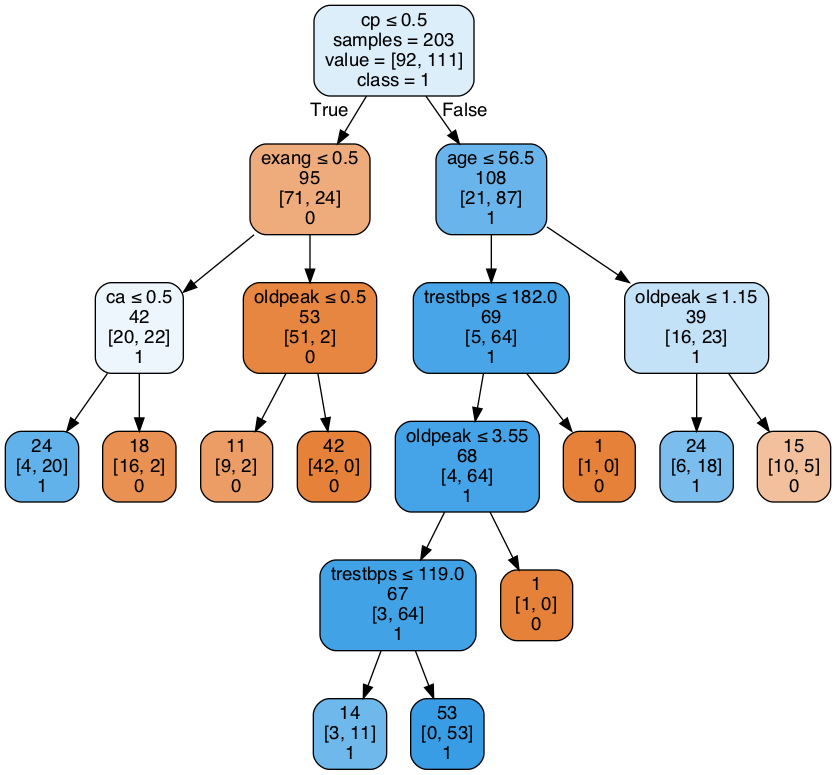

In [11]:
# Create classification tree based on the improved parameters.
bestClassTree = gridSearch.best_estimator_

# Display classification tree based on improved parameters
print('Best Classification Tree with Grid Search')
plotDecisionTree(bestClassTree, feature_names=train_X.columns, class_names=bestClassTree.classes_)

In [12]:
# Confusion matrices for grid search classification tree. 

# Identify and display confusion matrix for training partition. 
print('Confusion matrix for Training Partition using grid search')
classificationSummary(train_y, bestClassTree.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Confusion matrix for Validation Partition using grid search')
classificationSummary(valid_y, bestClassTree.predict(valid_X))

Confusion matrix for Training Partition using grid search
Confusion Matrix (Accuracy 0.8916)

       Prediction
Actual   0   1
     0  79  13
     1   9 102

Confusion matrix for Validation Partition using grid search
Confusion Matrix (Accuracy 0.7200)

       Prediction
Actual  0  1
     0 33 13
     1 15 39


# Logistic Regression Model For Heart Disease Prediction

### Logistic Regression Model with all the predictors

In [13]:
# Using LogisticRegression() function, fit multiple predictors logistic 
# regression for training partition. Set penalty='l2' for regularization. 
# Regularization is any modification to a learning algorithm that is 
# intended to reduce its generalization error but not its training error.
# Regularization can be used to train models that generalize 
# better on unseen data by preventing the algorithm from overfitting 
# the training data set.
# Parameter C=1e42 and penalty=l2 lead to ordinal logistic regression. 
# solver='liblinear' is used for automated selection of the best parameters
# of the logistis regression; recommended for large-scale classification.
log_reg = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
log_reg.fit(train_X, train_y)

# Show intercept and coefficients of the multiple predictors' logistic model.
print('Parameters of Logistic Regresion Model with Multiple Predictors')
print('Intercept:', np.round(log_reg.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(log_reg.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())

Parameters of Logistic Regresion Model with Multiple Predictors
Intercept: 2.735
Coefficients for Predictors
          age    sex     cp  trestbps   chol    fbs  restecg  thalach  exang  \
Coeff: -0.014 -2.284  1.124    -0.025 -0.006  0.662    0.773    0.036  -1.38   

        oldpeak  slope     ca   thal  
Coeff:   -0.881   0.14 -0.661 -0.399  


In [14]:
# Make predictions for validation set using multiple
# predictors logistic regression model. 

# Predict multiple predictors logistic model's results 
# (0 or 1) for validation set.
log_pred = log_reg.predict(valid_X)

# Predict multiple predictors logistic model's probabilities 
# p(0) and p(1) for validation set.
log_prob = np.round(log_reg.predict_proba(valid_X), decimals=4)

# Create data frame to show multiple predictors logistic
# model resuts for validation set. 
log_result = pd.DataFrame({'Actual': valid_y, 
                    'Classification': log_pred,
                    'p(0)': [p[0] for p in log_prob],
                    'p(1)': [p[1] for p in log_prob]
})

print('Classification for Validation Partition')
print(log_result.head(20))

Classification for Validation Partition
     Actual  Classification    p(0)    p(1)
204       0               0  0.9986  0.0014
159       1               1  0.2385  0.7615
219       0               0  0.9283  0.0717
174       0               0  0.9976  0.0024
184       0               0  0.9853  0.0147
295       0               0  0.9991  0.0009
269       0               0  0.9926  0.0074
119       1               1  0.3508  0.6492
193       0               0  0.9989  0.0011
154       1               1  0.0052  0.9948
51        1               0  0.7018  0.2982
249       0               0  0.9452  0.0548
278       0               1  0.1158  0.8842
229       0               0  0.8466  0.1534
208       0               0  0.7589  0.2411
302       0               1  0.0343  0.9657
58        1               1  0.0063  0.9937
220       0               0  0.9953  0.0047
18        1               0  0.5731  0.4269
228       0               1  0.1822  0.8178


In [15]:
# Confusion matrices for multiple predictors logistic model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y, log_reg.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y, log_reg.predict(valid_X))

Training Partition
Confusion Matrix (Accuracy 0.8768)

       Prediction
Actual   0   1
     0  78  14
     1  11 100

Validation Partition
Confusion Matrix (Accuracy 0.7700)

       Prediction
Actual  0  1
     0 33 13
     1 10 44


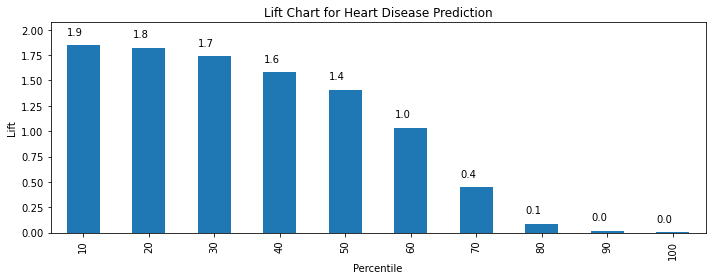

In [16]:
# Develop and display Gains chart and Lift chart. 

# Create a new df data frame from logit_result data frame
# that is sorted by p(1) in descending order.  
df = log_result.sort_values(by=['p(1)'], ascending=False)

# Create a data plot with two plots (ncols=1) 
# back-to-back (nrows=1).
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

# Using liftChart() function, create decile-wise Lift chart. 
# In this Lift chart, taking the 10% of the records 
# that are ranked by the model as 'most probable 1's' 
# yields 7.8 times as many 1's as would simply selecting 
# 10% of the records at random.
liftChart(df['p(1)'], title='Lift Chart for Heart Disease Prediction')
 
# Display the charts. 
plt.tight_layout()
plt.show()

### Logistic Regression Model Using Exhaustive Search Algorithm

In [17]:
# Develop predictors X and output variable Y for the data set.
X = heart_df.drop(columns = ['target'])
y = heart_df['target']

# Develop training (67%) and validation(33% or 0.33) partitions for heart data frame.
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.33, random_state=1)

# Define train_model() function used in Exhaustive Search
# algorithm with executive_search() function. 
def train_model(variables):
    model = LogisticRegression(max_iter=1000)
    model.fit(train_X[variables], train_y)
    return model

# Define score_model() function used in Exhaustive Search
# algorithm with executive_search() function. 
def score_model(model, variables):
    pred_y = model.predict(train_X[variables])
    # Apply negative sign as score is optimized to be 
    # as low as possible in exhaustive_search() function.
    return -adjusted_r2_score(train_y, pred_y, model)

# Create allVariables object with predcitors in train_X,
# i.e., training data set, with 11 predictor columns and 
# 600 records.
allVariables = train_X.columns

# The exhaustive_search() function consists of 3 arguments:
# - allVariables - list of all variables in training data set,
# - train_model() function that creates a model for a specific 
#    combination of variables,
# - score_model() function that score the model performance using
#     adjusted_r2.
results = exhaustive_search(allVariables, train_model, score_model)

print(pd.DataFrame(results))

# Create data[] loop process to identify the best model for each
# combination of 1, 2, 3, ..., 11 variables. 
data = []
for result in results:
    model = result['model']
    variables = result['variables']
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)

# Define the width of output presentation to be wider to
# to display results in two rows (instead of more rows
# otherwise). 
pd.set_option('display.width', 100)

# Display the Exhaustive Search results.
print()
print()
print(pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables))))

# Reset the output width to the default. 
pd.reset_option('display.width')

     n                                          variables     score  \
0    1                                               [cp] -0.101014   
1    2                                          [cp, fbs] -0.101014   
2    3                               [cp, exang, oldpeak] -0.360721   
3    4                          [sex, cp, exang, oldpeak] -0.360721   
4    5                      [sex, cp, exang, oldpeak, ca] -0.460608   
5    6          [sex, cp, trestbps, exang, oldpeak, thal] -0.520541   
6    7     [sex, cp, trestbps, fbs, exang, oldpeak, thal] -0.520541   
7    8  [age, sex, cp, trestbps, exang, oldpeak, ca, t... -0.520541   
8    9  [sex, cp, chol, thalach, exang, oldpeak, slope... -0.560496   
9   10  [age, sex, cp, trestbps, chol, fbs, exang, old... -0.540518   
10  11  [sex, cp, trestbps, chol, fbs, restecg, thalac... -0.520541   
11  12  [sex, cp, trestbps, chol, fbs, restecg, thalac... -0.520541   
12  13  [age, sex, cp, trestbps, chol, fbs, restecg, t... -0.500563   

     

In [18]:
# Develop the multiple linear regression model based
# on the Exhaustive Search results.

# Identify predictors and outcome of the regression model.
predictors_ex = ['sex', 'cp', 'chol', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']
outcome = 'target'

# Identify X and y variables for regression and partition data
# using 67% of records for training and 33% for validation 
# (test_size=0.33). 
X = heart_df[predictors_ex]
y = heart_df[outcome]
train_X_ex, valid_X_ex, train_y_ex, valid_y_ex = \
          train_test_split(X, y, test_size=0.33, random_state=1)

# Create multiple linear regression model using X and y.
heart_ex = LogisticRegression(penalty='l2', C=1e42, solver='liblinear')
heart_ex.fit(train_X_ex, train_y_ex)

# Display intercept and regression coefficients. Round them
# to 2 decimals.
print('Parameters of Logistic Regresion Model using Exhaustive Search Algorithm')
print('Intercept:', np.round(heart_ex.intercept_[0], decimals=3))
print('Coefficients for Predictors')
print(pd.DataFrame({'Coeff:': np.round(heart_ex.coef_[0], decimals=3)}, 
                    index=X.columns).transpose())


Parameters of Logistic Regresion Model using Exhaustive Search Algorithm
Intercept: 0.227
Coefficients for Predictors
          sex     cp   chol  thalach  exang  oldpeak  slope     ca   thal
Coeff: -1.951  0.987 -0.008    0.033 -1.318   -0.917  0.153 -0.643 -0.493


In [19]:
# Confusion matrices for Exhaustive Search Algorithm.

# Identify and display confusion matrix for training partition. 
print('Training Partition')
classificationSummary(train_y_ex, heart_ex.predict(train_X_ex))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition')
classificationSummary(valid_y_ex, heart_ex.predict(valid_X_ex))

Training Partition
Confusion Matrix (Accuracy 0.8621)

       Prediction
Actual  0  1
     0 76 16
     1 12 99

Validation Partition
Confusion Matrix (Accuracy 0.8100)

       Prediction
Actual  0  1
     0 35 11
     1  8 46


# Neural Network Model For Heart Disease Prediction

### Neural networks model using hidden_layer_sizes = 8

In [20]:
# Identify predictors and outcome for neural network model. 
outcome = 'target'
predictors =  [c for c in heart_df.columns if c != outcome]

# Identify X and y variables for regression and partition data
# using 67% of records for training and 33% for validation 
# (test_size=0.33). 
X = heart_df[predictors]
y = heart_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.33, random_state=1)

# Display the first 5 records of training partition's predictors. 
print('The first 5 records for Training Partition')
print(train_X.head(5))

# Use MLPCclassifier() function to train neural network model.
# Apply: 
heart_clf = MLPClassifier(hidden_layer_sizes=(8), max_iter=10000,
                solver='lbfgs', random_state=1)
# activation='logistic'
heart_clf.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(heart_clf.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(heart_clf.coefs_)

The first 5 records for Training Partition
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
91    57    1   0       132   207    0        1      168      1      0.0   
221   55    1   0       140   217    0        1      111      1      5.6   
172   58    1   1       120   284    0        0      160      0      1.8   
44    39    1   2       140   321    0        0      182      0      0.0   
169   53    1   0       140   203    1        0      155      1      3.1   

     slope  ca  thal  
91       2   0     3  
221      0   0     3  
172      1   0     2  
44       2   0     2  
169      0   0     3  
Final Intercepts for Accidents Neural Network Model
[array([ 0.4736983 ,  0.13085561, -0.5184183 ,  0.45908771,  0.20407739,
        0.56247296, -0.35028273, -0.39922736]), array([-0.77191235])]

Network Weights for Accidents Neural Network Model
[array([[ 0.58124561,  0.17840446, -0.58415841, -0.21130484, -0.37761503,
        -1.07303709, -0.33538524, -0.9814

In [21]:
# Make heart disease classification for validation set 
# using the neural network model. 

# Use heart_clf model to classify accident severity
# for validation set.
heart_pred = heart_clf.predict(valid_X)

# Predict accident severity probabilities p(0),and p(1) for validation set.
heart_pred_prob = np.round(heart_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
accident_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in heart_pred_prob],
                'p(1)': [p[1] for p in heart_pred_prob],
                'Classification': heart_pred})

print('Classification for Accidents Data for Validation Partition')
print(accident_pred_result.head(10))

Classification for Accidents Data for Validation Partition
     Actual    p(0)    p(1)  Classification
204       0  0.8604  0.1396               0
159       1  0.2539  0.7461               1
219       0  0.9321  0.0679               0
174       0  0.9968  0.0032               0
184       0  0.9838  0.0162               0
295       0  0.9987  0.0013               0
269       0  0.9921  0.0079               0
119       1  0.4650  0.5350               1
193       0  0.9980  0.0020               0
154       1  0.0139  0.9861               1


In [22]:
# Confusion matrices for heart disease neural network model. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Neural Network Model')
classificationSummary(train_y, heart_clf.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Neural Network Model')
classificationSummary(valid_y, heart_clf.predict(valid_X))

Training Partition for Neural Network Model
Confusion Matrix (Accuracy 0.8818)

       Prediction
Actual   0   1
     0  77  15
     1   9 102

Validation Partition for Neural Network Model
Confusion Matrix (Accuracy 0.7900)

       Prediction
Actual  0  1
     0 35 11
     1 10 44


### Neural networks model using Grid search to find the best parameter

In [23]:
# Identify grid search parameters. 
param_grid = {
    'hidden_layer_sizes': list(range(2, 20)), 
}

# Utilize GridSearchCV() to identify the best number 
# of nodes in the hidden layer. 
gridSearch = GridSearchCV(MLPClassifier(solver='lbfgs', max_iter=10000, random_state=1), 
                          param_grid, cv=5, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X, train_y)

# Display the best score and best parament value.
print(f'Best score:{gridSearch.best_score_:.4f}')
print('Best parameter: ', gridSearch.best_params_)

Best score:0.8383
Best parameter:  {'hidden_layer_sizes': 6}


### Using MLPClassifier() function and grid search results to train neural network model.

In [24]:
# Use MLPCclassifier() function to train the neural network model
# based on grid search results. 

# Apply: 
# (a) default input layer with the number of nodes equal 
#     to number of predictor variables (13); 
# (b) single hidden layer with 6 nodes based on grid search; 
# (c) default output layer with the number nodes equal
#     to number of classes in outcome variable (2);
# (d) 'logistic' activation function;
# (e) solver = 'lbfgs', which is applied for small data 
#     sets for better performance and fast convergence. 
heart_clf_imp = MLPClassifier(hidden_layer_sizes=(6), max_iter=10000,
                activation='logistic', solver='lbfgs', random_state=1)
heart_clf_imp.fit(train_X, train_y)

# Display network structure with the final values of 
# intercepts (Theta) and weights (W).
print('Final Intercepts for Accidents Neural Network Model')
print(heart_clf_imp.intercepts_)

print()
print('Network Weights for Accidents Neural Network Model')
print(heart_clf_imp.coefs_)

Final Intercepts for Accidents Neural Network Model
[array([-0.61610218,  0.14664686,  0.24872184,  0.08017035, 73.2402643 ,
        1.46106167]), array([1.09211813])]

Network Weights for Accidents Neural Network Model
[array([[ 7.59637689e+00,  1.08256608e-01, -2.45619184e-01,
        -1.01098143e-01, -2.87430992e+00, -4.43294039e+00],
       [ 1.80927385e-01, -7.58838550e-02, -5.07233805e-02,
         1.90050969e-02, -6.61560961e+01, -2.52541469e+00],
       [ 1.43608676e+01,  1.85788292e-01, -2.32218468e-01,
         8.37579799e-02,  2.74591759e+01, -1.37821774e+01],
       [ 1.59142924e+01, -1.48338065e-01,  1.47771074e-01,
         2.19057637e-01, -8.82745690e-01,  1.14269151e+00],
       [ 3.07364328e+01,  1.93890285e-01, -2.03888844e-01,
        -2.38336599e-01, -2.17718039e-01,  2.61327422e-01],
       [-1.03110138e+01, -3.87638288e-02,  2.24984371e-01,
         1.62292199e-02,  1.10728859e+01, -9.83802266e-02],
       [ 4.70978468e+00,  1.64418580e-01, -2.36689424e-01,
      

In [25]:
# Make heart severity classification for validation set 
# using heart neural network model. 

# Use heart_clf model to classify heart severity
# for validation set.
heart_pred = heart_clf.predict(valid_X)

# Predict heart severity probabilities p(0), p(1) for validation set.
heart_pred_prob = np.round(heart_clf.predict_proba(valid_X), 
                          decimals=4)

# Create data frame to display classification results for
# validation set. 
heart_pred_result = pd.DataFrame({'Actual': valid_y, 
                'p(0)': [p[0] for p in heart_pred_prob],
                'p(1)': [p[1] for p in heart_pred_prob],
                'Classification': heart_pred})

print('Classification for Heart Data for Validation Partition')
print(heart_pred_result.head(10))

Classification for Heart Data for Validation Partition
     Actual    p(0)    p(1)  Classification
204       0  0.8604  0.1396               0
159       1  0.2539  0.7461               1
219       0  0.9321  0.0679               0
174       0  0.9968  0.0032               0
184       0  0.9838  0.0162               0
295       0  0.9987  0.0013               0
269       0  0.9921  0.0079               0
119       1  0.4650  0.5350               1
193       0  0.9980  0.0020               0
154       1  0.0139  0.9861               1


In [26]:
# Confusion matrices for neural network model for Heart
# using grid search results. 

# Identify and display confusion matrix for training partition. 
print('Training Partition for Heart Neural Network Model')
classificationSummary(train_y, heart_clf_imp.predict(train_X))

# Identify and display confusion matrix for validation partition. 
print()
print('Validation Partition for Heart Neural Network Model')
classificationSummary(valid_y, heart_clf_imp.predict(valid_X))

Training Partition for Heart Neural Network Model
Confusion Matrix (Accuracy 0.9113)

       Prediction
Actual  0  1
     0 88  4
     1 14 97

Validation Partition for Heart Neural Network Model
Confusion Matrix (Accuracy 0.7500)

       Prediction
Actual  0  1
     0 36 10
     1 15 39
